# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Координаты значений параметров оптимизации: [array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([ 1.96461714, -0.98241704])] 
Координаты количества итераций (nit): [212, 332, 371, 113, 7]


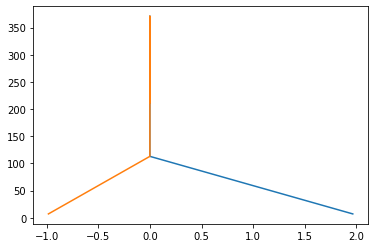

In [54]:
x = []
y = []

res1 = differential_evolution(ackley, bounds, strategy='best1bin', popsize=10, mutation=(1.9, 0.7), seed=42)
x.append(res1.x)
y.append(res1['nit'])
res2 = differential_evolution(ackley, bounds, strategy='rand1exp', popsize=8, mutation=(1, 1), seed=42)
x.append(res2.x)
y.append(res2['nit'])
res3 = differential_evolution(ackley, bounds, strategy='best2exp', popsize=20, mutation=(0.5, 1.5), seed=42)
x.append(res3.x)
y.append(res3['nit'])
res4 = differential_evolution(ackley, bounds, strategy='randtobest1bin', popsize=13, mutation=(1.5, 0.2), seed=42)
x.append(res4.x)
y.append(res4['nit'])
res5 = differential_evolution(ackley, bounds, strategy='rand2bin', popsize=7, mutation=(0, 0), seed=42)
x.append(res5.x)
y.append(res5['nit'])
print(f'Координаты значений параметров оптимизации: {x} \nКоординаты количества итераций (nit): {y}')

plt.plot(x, y)
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [46]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [60]:
result_m1 = minimize(ackley, x0,  method='Nelder-Mead', jac=None, options={'xtol':1e-10, 'disp':True})
result_m1.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 89


array([0., 0.])

In [59]:
result_m2 = minimize(ackley, x0,  method='CG', jac=ackley, options={'disp':True})
result_m2.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


array([0., 0.])

In [66]:
result_m3 = minimize(ackley, x0,  method='COBYLA', jac=ackley, options={'disp':True})
result_m3

     fun: 0.00028310899612238316
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([-8.76258342e-06,  9.96153459e-05])

In [69]:
result_m4 = minimize(ackley, x0,  method='COBYLA', jac=None, options={'xtol':1e-10, 'disp':True})
result_m4

     fun: 0.00028310899612238316
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([-8.76258342e-06,  9.96153459e-05])

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
